In [53]:
import pandas as pd

df = pd.read_csv('./data/data.csv', header=None)

df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
dfY = df.loc[0: 100, 4].values

print(set(dfY))
#  杂色 维吉尼亚  刚毛

{'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [55]:
y = np.where(dfY == 'Iris-setosa', -1, 1)

print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


In [56]:
X = df.iloc[0:100, [0, 2]].values

print(X[:10])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


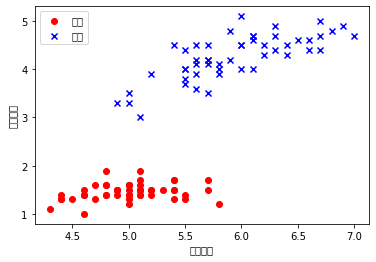

In [65]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="杂色")
plt.scatter(X[50:100, 0], X[50: 100, 1], color="blue", marker='x', label="纯色")
plt.xlabel("花径长度")
plt.ylabel("花瓣长度")
plt.legend(loc="upper left")

In [58]:
import numpy as np

class Perceptron:
    """
    eta: 学习率
    n_iter: 训练次数
    w_: 神经分叉权重向量
    errors_: 记录神经元判断错误率
    """
    def __init__(self, eta = 0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    
    """
    输入训练数据, 培训神经元, X输入样本向量, y对应样本分类
    
    X:shape[n_samples, n_features]    [[1,2,3], [4,5,6]]
    n_samples: 2
    n_features: 3
    
    y: [1, -1]
    初始化权重向量为0
    加一是因为前面算法提到的w0，也就是步调函数阈值
    """
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]);
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            """
            X: [[1,2,3], [4,5,6]]
            y: [1, -1]
            zip(X,y) = [[1,2,3,1], [4,5,6, -1]]
            
            """
            for xi, target in zip(X,y):
                """
                update = Ω * (Y - y')
                """
                update = self.eta * (target - self.predict(xi))
                
                """
                xi 是一个向量
                update * xi 等价:
                
                """
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                self.errors_.append(errors)
                pass
            pass
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 , 1, -1)
    

Text(0, 0.5, 'ErrorTimes')

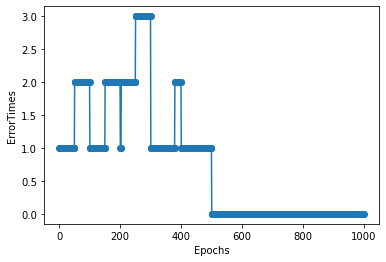

In [59]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel('ErrorTimes')

In [70]:
from matplotlib.colors import ListedColormap

def ploy_decision_regions(X, y, classifier, resolution = 0.02):
  # print(y)
  markers = ('s', 'x', 'o', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max()
  x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max()


  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # print('x1_min',x1_min)
  # print('x1_max', x1_max)
  # print('np.arange(x1_min, x1_max, resolution)', np.arange(x1_min, x1_max, resolution), np.arange(x1_min, x1_max, resolution).shape)
  # print('x2_min',x2_min)
  # print('x2_max', x2_max)
  # print('xx1', xx1)
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
  print('xx1.ravel()', xx1.ravel())
  print('xx2.ravel()', xx2.ravel())
  print('Z', Z)

  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    print(idx)
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


xx1.ravel() [3.3  3.32 3.34 ... 6.94 6.96 6.98]
xx2.ravel() [0.   0.   0.   ... 5.08 5.08 5.08]
Z [[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]
0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 101

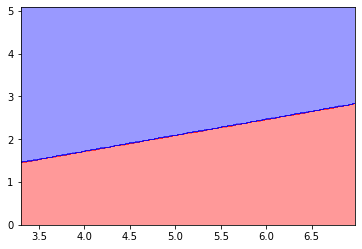

In [71]:
ploy_decision_regions(X, y, ppn, resolution=0.02)
plt.xlabel("花径长度")
plt.ylabel("花瓣长度")
plt.legend(loc="upper left")
plt.show()